In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import plot
from matplotlib.pyplot import show

from numpy.fft import fft as FFT
from numpy.fft import ifft as IFFT
from numpy.fft import fftshift as SHIFT

In [3]:
global N,a,z,wl,k
N = 2304
#a = 10e-3  # 開口の大きさ（5mm）
z = 0.5  # 開口からスクリーンまでの距離（5m）
wl = 405e-9  # 波長（400nm）
D = 0.015 #サンプリング領域の大きさ
k = 2*np.pi /wl

In [4]:
global ap_x0,ap_y0,ap_rx,ap_ry
ap_x0 = 1152*D/N
ap_y0 = 1252*D/N
ap_rx = 216*D/N
ap_ry = 410*D/N

In [5]:
def plane(x, y):
    #global ap_x0,ap_y0,ap_rx,ap_r
    if abs(x - ap_x0) < ap_rx and abs(y-ap_y0) < ap_ry:
        return 1
    else:
        return 0

In [6]:
X,Y = np.meshgrid(np.linspace(0,D,num = N),np.linspace(0,D,num = N))
Pv = np.vectorize(plane)
Z = Pv(X, Y)

Text(0, 0.5, '$y_p$ [m]')

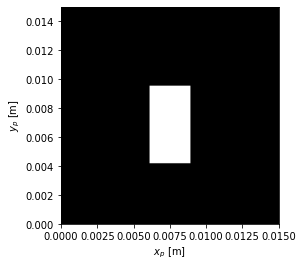

In [7]:
plt.imshow(Z,extent=[0, D, 0, D],cmap='gray')
plt.xlabel('$x_p$ [m]')
plt.ylabel('$y_p$ [m]')

In [8]:
def AS2D(Z):
    NZ = np.zeros((2*N,2*N))
    NZ[int(N/2):int(N*3/2),int(N/2):int(N*3/2)] = Z
    plt.imshow(NZ)
    U = np.fft.fft2(NZ)
    
    k_x = np.fft.fftfreq(2*N,d = D/N) * 2 * np.pi
    k_y = np.fft.fftfreq(2*N,d= D/N) * 2 * np.pi
    K_X, K_Y = np.meshgrid(k_x, k_y)
    k_z = np.sqrt(k**2 - K_X**2 - K_Y**2)
    U_angular = np.fft.ifft2(U * np.exp(1.0j * k_z * z))
    
    I_angular = np.abs(U_angular)**2
    I_angular = I_angular / np.max(I_angular)
    return I_angular[int(N/2):int(N*3/2),int(N/2):int(N*3/2)] 

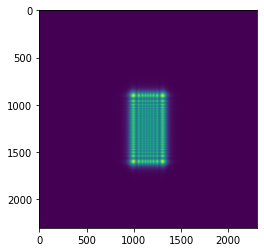

In [13]:
z  = 0.55
U  = AS2D(Z)
plt.imshow(U)

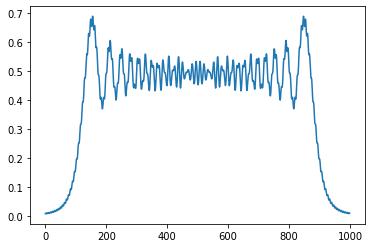

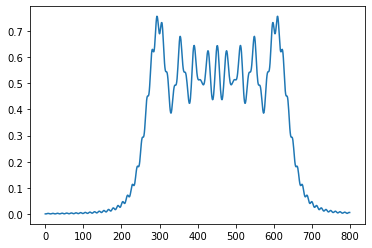

In [14]:
plot(U[750:1750,1100])
plt.show()
plot(U[1100][700:1500])
plt.show()